In [1]:
#pip install librosa

In [2]:
#pip install tensorflow

In [3]:
#pip install tqdm

In [4]:
#pip install sklearn

In [5]:
#pip install numpy

In [6]:
#pip install pandas

In [7]:
import pandas as pd
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
from tensorflow import keras
from tqdm import tqdm
from sklearn.metrics import confusion_matrix

In [8]:

CSV_FILE_PATH = "./base/archive/esc50.csv"
DATA_PATH = "./base/archive/audio/"

df = pd.read_csv(CSV_FILE_PATH, sep=',')

In [9]:
df.head()

,filename,target,category
0,1-34094-A-5.wav,5,gato
1,1-34094-B-5.wav,5,gato
2,1-47819-A-5.wav,5,gato
3,1-47819-B-5.wav,5,gato
4,1-47819-C-5.wav,5,gato


In [10]:
df.describe()

,target
count,596.000000
mean,32.895973
std,46.327072
min,0.000000
25%,0.000000
50%,5.000000
75%,111.000000
max,111.000000


In [11]:

classes = df['category'].unique()
print(classes)
class_dict = {i:x for x,i in enumerate(classes)}

class_dict

df = df.drop_duplicates(subset=['filename'])

df['target'] = df['category'].map(class_dict)

X = []
y = []

['gato' 'cachorro' 'batendo_porta' 'silencio']


In [12]:
df = df.dropna()

In [13]:
df['target'].unique()

array([0, 1, 2, 3], dtype=int64)

In [14]:
df['category'].unique()

array(['gato', 'cachorro', 'batendo_porta', 'silencio'], dtype=object)

In [15]:
df.sample(10)

,filename,target,category
485,silencio40.wav,3,silencio
464,silencio19.wav,3,silencio
116,5-250026-B-30.wav,2,batendo_porta
46,1-85362-A-0.wav,1,cachorro
531,silencio86.wav,3,silencio
471,silencio26.wav,3,silencio
577,silencio132.wav,3,silencio
495,silencio50.wav,3,silencio
82,1-103999-A-30.wav,2,batendo_porta
494,silencio49.wav,3,silencio


In [16]:
index = 0
dfLen = df.shape[0]
for data in tqdm(df.iterrows(),  desc='Progress'):
    sig , sr = librosa.load(DATA_PATH+data[1][0])  
    mfcc_ = librosa.feature.mfcc(y=sig, sr=sr, n_mfcc=40)
    X.append(mfcc_)
    y.append(data[1][1])
    index = index+1
    print(str(index) + " de " + str(dfLen))

Progress: 6it [00:03,  2.02it/s]

1 de 294
2 de 294
3 de 294
4 de 294
5 de 294
6 de 294
7 de 294
8 de 294
9 de 294
10 de 294


Progress: 16it [00:04,  7.24it/s]

11 de 294
12 de 294
13 de 294
14 de 294
15 de 294
16 de 294
17 de 294
18 de 294
19 de 294
20 de 294


Progress: 26it [00:04, 14.82it/s]

21 de 294
22 de 294
23 de 294
24 de 294
25 de 294
26 de 294
27 de 294
28 de 294
29 de 294
30 de 294


Progress: 36it [00:04, 23.74it/s]

31 de 294
32 de 294
33 de 294
34 de 294
35 de 294
36 de 294
37 de 294
38 de 294
39 de 294
40 de 294
41 de 294


Progress: 52it [00:04, 37.42it/s]

42 de 294
43 de 294
44 de 294
45 de 294
46 de 294
47 de 294
48 de 294
49 de 294
50 de 294
51 de 294
52 de 294


Progress: 63it [00:05, 43.19it/s]

53 de 294
54 de 294
55 de 294
56 de 294
57 de 294
58 de 294
59 de 294
60 de 294
61 de 294
62 de 294
63 de 294


Progress: 68it [00:05, 43.95it/s]

64 de 294
65 de 294
66 de 294
67 de 294
68 de 294
69 de 294
70 de 294
71 de 294
72 de 294
73 de 294


Progress: 79it [00:05, 46.34it/s]

74 de 294
75 de 294
76 de 294
77 de 294
78 de 294
79 de 294
80 de 294
81 de 294
82 de 294
83 de 294
84 de 294


Progress: 90it [00:05, 45.46it/s]

85 de 294
86 de 294
87 de 294
88 de 294
89 de 294
90 de 294
91 de 294
92 de 294
93 de 294


Progress: 100it [00:05, 42.93it/s]

94 de 294
95 de 294
96 de 294
97 de 294
98 de 294
99 de 294
100 de 294
101 de 294
102 de 294


Progress: 110it [00:06, 44.09it/s]

103 de 294
104 de 294
105 de 294
106 de 294
107 de 294
108 de 294
109 de 294
110 de 294
111 de 294
112 de 294


Progress: 120it [00:06, 44.64it/s]

113 de 294
114 de 294
115 de 294
116 de 294
117 de 294
118 de 294
119 de 294
120 de 294
121 de 294


Progress: 125it [00:06, 40.04it/s]

122 de 294
123 de 294
124 de 294
125 de 294
126 de 294
127 de 294
128 de 294


Progress: 134it [00:06, 35.50it/s]

129 de 294
130 de 294
131 de 294
132 de 294
133 de 294
134 de 294
135 de 294


Progress: 138it [00:06, 34.59it/s]

136 de 294
137 de 294
138 de 294
139 de 294
140 de 294
141 de 294
142 de 294


Progress: 150it [00:07, 34.24it/s]

143 de 294
144 de 294
145 de 294
146 de 294
147 de 294
148 de 294
149 de 294
150 de 294


Progress: 154it [00:07, 34.64it/s]

151 de 294
152 de 294
153 de 294
154 de 294
155 de 294
156 de 294
157 de 294


Progress: 162it [00:07, 32.60it/s]

158 de 294
159 de 294
160 de 294
161 de 294
162 de 294
163 de 294
164 de 294


Progress: 170it [00:07, 33.34it/s]

165 de 294
166 de 294
167 de 294
168 de 294
169 de 294
170 de 294
171 de 294
172 de 294


Progress: 178it [00:08, 30.69it/s]

173 de 294
174 de 294
175 de 294
176 de 294
177 de 294
178 de 294


Progress: 182it [00:08, 29.97it/s]

179 de 294
180 de 294
181 de 294
182 de 294
183 de 294
184 de 294
185 de 294


Progress: 190it [00:08, 31.08it/s]

186 de 294
187 de 294
188 de 294
189 de 294
190 de 294
191 de 294
192 de 294


Progress: 198it [00:08, 32.42it/s]

193 de 294
194 de 294
195 de 294
196 de 294
197 de 294
198 de 294
199 de 294
200 de 294


Progress: 206it [00:09, 32.18it/s]

201 de 294
202 de 294
203 de 294
204 de 294
205 de 294
206 de 294
207 de 294


Progress: 215it [00:09, 34.46it/s]

208 de 294
209 de 294
210 de 294
211 de 294
212 de 294
213 de 294
214 de 294
215 de 294


Progress: 219it [00:09, 34.84it/s]

216 de 294
217 de 294
218 de 294
219 de 294
220 de 294
221 de 294
222 de 294


Progress: 227it [00:09, 32.85it/s]

223 de 294
224 de 294
225 de 294
226 de 294
227 de 294
228 de 294
229 de 294


Progress: 235it [00:09, 32.37it/s]

230 de 294
231 de 294
232 de 294
233 de 294
234 de 294
235 de 294
236 de 294


Progress: 243it [00:10, 31.66it/s]

237 de 294
238 de 294
239 de 294
240 de 294
241 de 294
242 de 294
243 de 294


Progress: 247it [00:10, 31.49it/s]

244 de 294
245 de 294
246 de 294
247 de 294
248 de 294
249 de 294


Progress: 255it [00:10, 29.69it/s]

250 de 294
251 de 294
252 de 294
253 de 294
254 de 294
255 de 294


Progress: 261it [00:10, 28.43it/s]

256 de 294
257 de 294
258 de 294
259 de 294
260 de 294
261 de 294


Progress: 265it [00:10, 29.38it/s]

262 de 294
263 de 294
264 de 294
265 de 294
266 de 294
267 de 294
268 de 294


Progress: 273it [00:11, 29.54it/s]

269 de 294
270 de 294
271 de 294
272 de 294
273 de 294
274 de 294


Progress: 280it [00:11, 29.39it/s]

275 de 294
276 de 294
277 de 294
278 de 294
279 de 294
280 de 294
281 de 294


Progress: 286it [00:11, 28.90it/s]

282 de 294
283 de 294
284 de 294
285 de 294
286 de 294
287 de 294


Progress: 294it [00:11, 24.53it/s]

288 de 294
289 de 294
290 de 294
291 de 294
292 de 294
293 de 294
294 de 294


In [17]:
X = np.array(X)
y = np.array(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [18]:

print(y)
num_classes=9
y = tf.keras.utils.to_categorical(y, num_classes)
y

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
label = tf.math.argmax(y, axis=1)
print(label)

tf.Tensor(
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3], shape=(294,), dtype=int64)


In [20]:

X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)





INPUTSHAPE = (40,216,1)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='valid', input_shape=INPUTSHAPE),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='valid'),
    layers.MaxPooling2D(2, padding='same'),
    layers.Dropout(0.3),
    layers.Conv2D(128, (3, 3), activation='relu', padding='valid'),
    layers.MaxPooling2D(2, padding='same'),
    layers.Dropout(0.3),
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dense(9, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='acc')
model.summary()

batch_size = 8
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=8, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 214, 32)       320       
                                                                 
 batch_normalization (Batch  (None, 38, 214, 32)       128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 19, 107, 32)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 105, 128)      36992     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 9, 53, 128)        0         
 g2D)                                                            
                                                        

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [30]:


history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=20,
                    callbacks=[callback], batch_size=batch_size)

model.save("modelo.p")




Epoch 1/20
28/28 [==============================] - 4s 152ms/step - loss: 0.0304 - acc: 0.9864 - val_loss: 0.0734 - val_acc: 0.9595
Epoch 2/20
28/28 [==============================] - 4s 148ms/step - loss: 0.0910 - acc: 0.9773 - val_loss: 0.2813 - val_acc: 0.9324
Epoch 3/20
28/28 [==============================] - 4s 146ms/step - loss: 0.3133 - acc: 0.9000 - val_loss: 0.0758 - val_acc: 0.9730
Epoch 4/20
28/28 [==============================] - 4s 147ms/step - loss: 0.0847 - acc: 0.9727 - val_loss: 0.1077 - val_acc: 0.9459
Epoch 5/20
28/28 [==============================] - 4s 148ms/step - loss: 0.0421 - acc: 0.9864 - val_loss: 0.3589 - val_acc: 0.9189
Epoch 6/20
28/28 [==============================] - 4s 148ms/step - loss: 0.0473 - acc: 0.9818 - val_loss: 0.1080 - val_acc: 0.9595
Epoch 7/20
28/28 [==============================] - 4s 147ms/step - loss: 0.0141 - acc: 1.0000 - val_loss: 0.0851 - val_acc: 0.9730
Epoch 8/20
28/28 [==============================] - 4s 151ms/step - loss: 0.

INFO:tensorflow:Assets written to: modelo.p\assets


In [22]:
predict_x=model.predict(X_test)
y_pred=np.argmax(predict_x,axis=1)
y_pred


3/3 [==============================] - 1s 98ms/step


array([2, 3, 3, 1, 3, 2, 0, 2, 3, 0, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 2, 1, 3, 2, 0, 2, 3, 3, 3, 3, 3, 3, 2, 2, 1, 0, 3, 3, 3,
       3, 3, 1, 0, 3, 3, 3, 1, 3, 3, 1, 2, 3, 3, 3, 3, 2, 3, 0, 0, 3, 3,
       3, 0, 3, 0, 3, 3, 2, 3], dtype=int64)

In [23]:
y_test_integer = tf.math.argmax(y_test, axis=1)
y_test_integer_array = y_test_integer.numpy()
print(y_test_integer_array)

[1 3 3 1 3 2 0 2 3 0 3 3 3 2 3 2 3 3 3 3 3 3 3 3 2 2 1 3 2 0 2 3 3 3 3 3 3
 2 2 1 0 3 3 3 3 3 1 0 3 3 3 0 3 3 1 2 3 3 3 3 2 3 0 0 3 3 3 1 3 0 3 3 2 3]


In [24]:
cf_matrix = confusion_matrix(y_test_integer_array, y_pred)
print(cf_matrix)

[[ 8  1  0  0]
 [ 1  5  1  0]
 [ 0  0 13  0]
 [ 0  0  0 45]]


<Axes: >

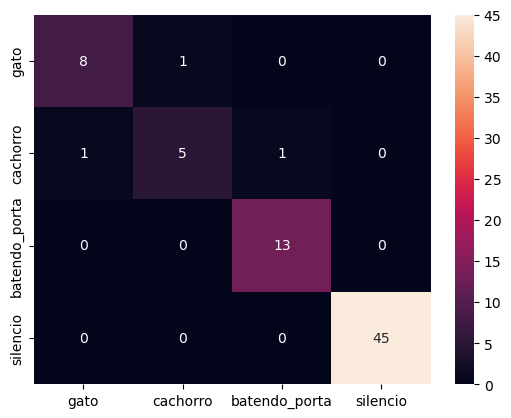

In [25]:
import seaborn as sns
sns.heatmap(cf_matrix,fmt='.0f', annot=True,xticklabels=df['category'].unique(), yticklabels=df['category'].unique())

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test_integer_array, y_pred,target_names=df['category'].unique()))

               precision    recall  f1-score   support

         gato       0.89      0.89      0.89         9
     cachorro       0.83      0.71      0.77         7
batendo_porta       0.93      1.00      0.96        13
     silencio       1.00      1.00      1.00        45

     accuracy                           0.96        74
    macro avg       0.91      0.90      0.91        74
 weighted avg       0.96      0.96      0.96        74

